In [6]:
%autosave 60
%matplotlib notebook

Autosaving every 60 seconds


In [7]:
# STL
import os
# Other
import matplotlib
import matplotlib.pyplot as plt  # Plots
import numpy as np  # Arrays
import pandas as pd  # DataFrames

In [8]:
plt.style.use('ggplot')
MERGED_FOLDER = os.path.join('data', 'merged')

print('Getting data...')

print('Merged correlation matrix...')
df_corr = pd.read_csv(os.path.join(
    MERGED_FOLDER, 'corr_matrix.csv'), index_col=0)

print('Finished getting data')

Getting data...
Merged correlation matrix...
Finished getting data


## Showing the problem w/ the default heatmap

<IPython.core.display.Javascript object>


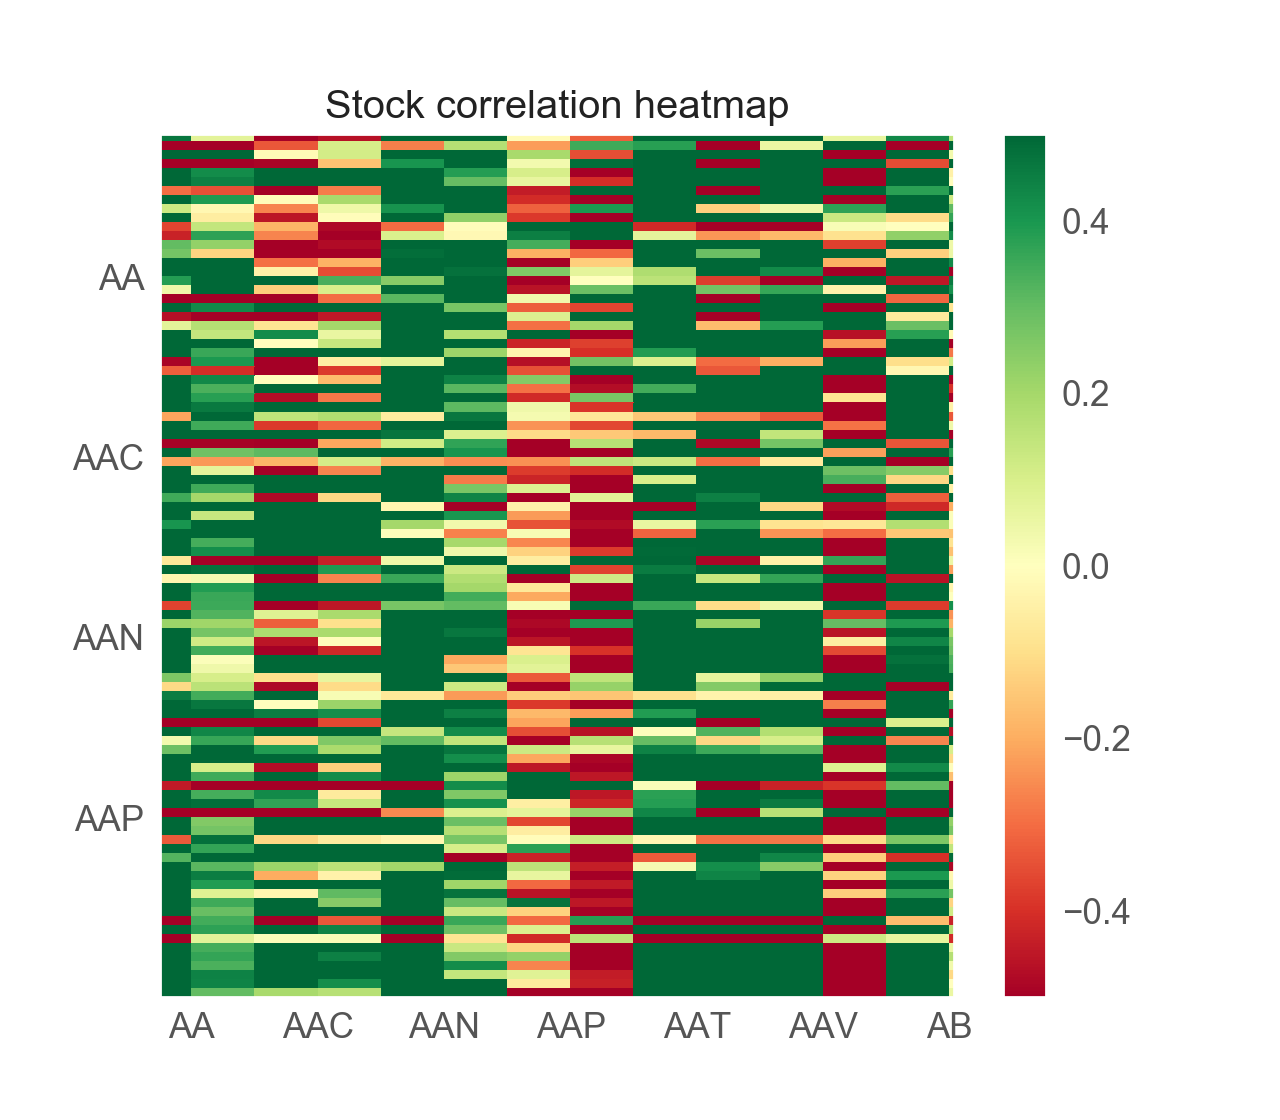

In [9]:
# PROBLEM - LABELS ARE WRONG
# Making a correlation matrix
fig = plt.figure()

# Setting up the axis
ax1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
ax1.invert_yaxis()

hmap = ax1.pcolormesh(df_corr.values, cmap=plt.cm.RdYlGn)
hmap.set_clim(-0.5, 0.5)  # Clipping limit
fig.colorbar(hmap)

ax1.set_xticklabels(df_corr.columns)
ax1.set_yticklabels(df_corr.columns)

# Plotting the heatmap
plt.title('Stock correlation heatmap', color='k')
plt.show()

## Plotting the full correlation matrix + proper labels

In [44]:
class StockFormatter(matplotlib.ticker.Formatter):
    def __init__(self, cols):
        self.cols = np.array(cols)

    def __call__(self, x, pos=None):
        return self.cols[np.clip(x, 0, len(self.cols) - 1).astype('int')]

# Making a correlation matrix 
fig = plt.figure()

# Preparing the axis formatters
cols = list(df_corr.columns)
formatter_x = StockFormatter(cols)
formatter_y = StockFormatter(cols)

locator_x = matplotlib.ticker.MaxNLocator(10)
locator_y = matplotlib.ticker.MaxNLocator(10)

# Setting up the axis
ax = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
ax.invert_yaxis()

# Plotting the table itself
hmap = ax.pcolormesh(df_corr.values, cmap=plt.cm.RdYlGn)
hmap.set_clim(-1, 1)  # Clipping limit
fig.colorbar(hmap)

x = ax.get_xaxis()
y = ax.get_yaxis()

# Setting tickers for X axis
x.set_major_formatter(formatter_x)
x.set_major_locator(locator_x)

plt.xticks(rotation=45)

# Setting tickers for Y axis
y.set_major_formatter(formatter_y)
y.set_major_locator(locator_y)

# Plotting the heatmap
plt.title('Stock correlation heatmap - fixed', color='k')
plt.show()

<IPython.core.display.Javascript object>

TypeError: tick_values() missing 2 required positional arguments: 'vmin' and 'vmax'